In [1]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2021,1,1)
end=datetime.datetime(2022,1,1)
google = web.DataReader("GOOGL",'yahoo',start,end)

In [2]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,88.124496,85.357002,88.000000,86.306503,37324000,86.306503
2021-01-05,87.341499,85.845001,86.254501,87.002502,20360000,87.002502
2021-01-06,87.198502,84.805000,85.013000,86.143997,46588000,86.143997
2021-01-07,88.890999,86.337997,86.337997,88.717003,41936000,88.717003
2021-01-08,89.968002,88.060997,88.858002,89.891502,35484000,89.891502


In [3]:
google['Open']

Date
2021-01-04     88.000000
2021-01-05     86.254501
2021-01-06     85.013000
2021-01-07     86.337997
2021-01-08     88.858002
                 ...    
2021-12-27    147.255997
2021-12-28    148.235992
2021-12-29    146.644501
2021-12-30    146.694000
2021-12-31    146.050003
Name: Open, Length: 252, dtype: float64

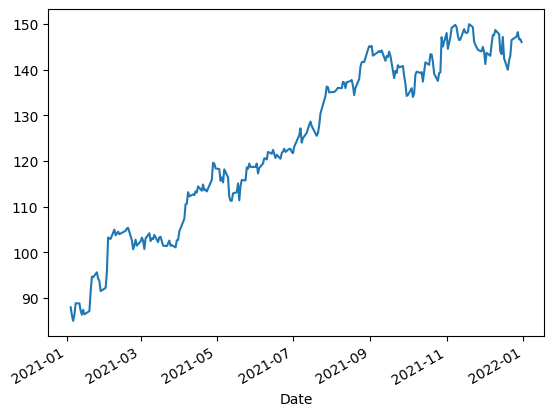

In [5]:
import matplotlib.pyplot as plt
google['Open'].plot()
plt.show()

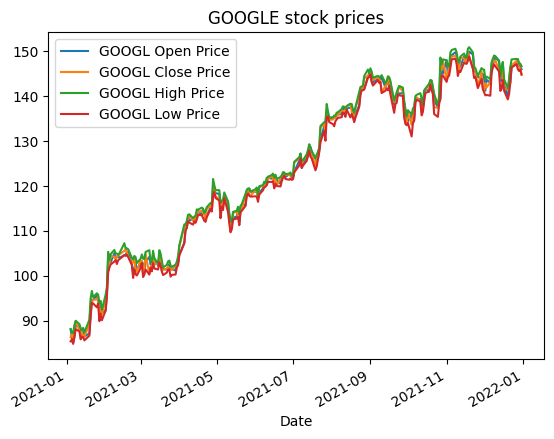

In [7]:
google['Open'].plot(label="GOOGL Open Price")
google['Close'].plot(label="GOOGL Close Price")
google['High'].plot(label="GOOGL High Price")
google['Low'].plot(label="GOOGL Low Price")
plt.legend()
plt.title("GOOGLE stock prices")
plt.show()

In [8]:
import numpy as np

In [9]:
tesla = web.DataReader('TSLA','yahoo',start,end)
ford=web.DataReader("F",'yahoo',start,end)
gm = web.DataReader("GM",'yahoo',start,end)

In [11]:
tesla.to_csv("Tesla_stock.csv")
ford.to_csv("ford_stock.csv")
gm.to_csv("gm_stock.csv")

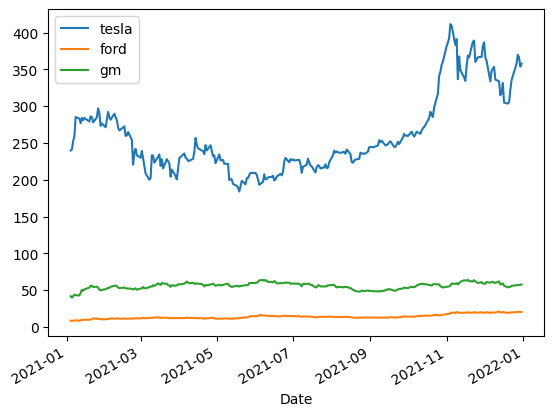

In [12]:
tesla['Open'].plot(label="tesla")
ford['Open'].plot(label="ford")
gm['Open'].plot(label="gm")
plt.legend()
plt.show()

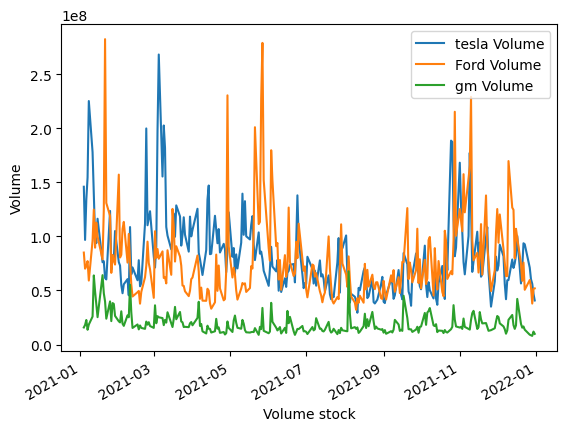

In [14]:
tesla['Volume'].plot(label='tesla Volume')
ford['Volume'].plot(label='Ford Volume')
gm['Volume'].plot(label='gm Volume')
plt.ylabel('Volume')
plt.xlabel('Volume stock')
plt.legend()
plt.show()

In [15]:
ford.iloc[ford['Volume'].argmax()]

High         1.215000e+01
Low          1.112000e+01
Open         1.128000e+01
Close        1.153000e+01
Volume       2.823941e+08
Adj Close    1.111002e+01
Name: 2021-01-21 00:00:00, dtype: float64

In [18]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']

tesla.head()
ford.head()
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2021-01-04,42.119999,40.139999,41.950001,40.509998,15768100,40.417721,6.614718e+08
2021-01-05,41.840000,40.040001,40.060001,41.660000,18045800,41.565102,7.229148e+08
2021-01-06,43.849998,41.860001,41.919998,42.980000,22694900,42.882095,9.513702e+08
2021-01-07,43.980000,42.959999,43.980000,43.320000,13625700,43.221321,5.992583e+08
2021-01-08,43.490002,42.320000,43.310001,43.060001,18426200,42.961914,7.980387e+08


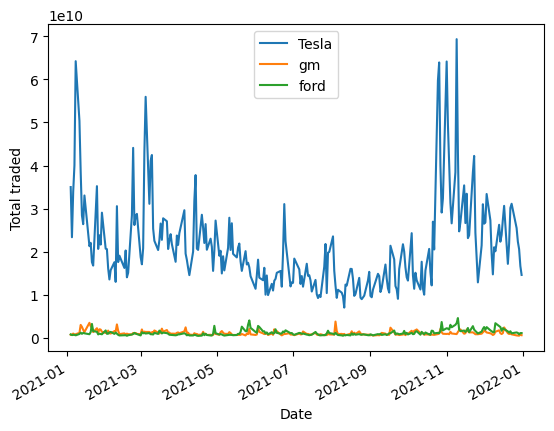

In [19]:
tesla['Total Traded'].plot(label='Tesla')
gm['Total Traded'].plot(label='gm')
ford['Total Traded'].plot(label='ford')
plt.legend()
plt.ylabel("Total traded")
plt.show()


In [21]:
tesla['Total Traded'].argmax()
tesla.iloc[tesla['Total Traded'].argmax()] 

High            3.915000e+02
Low             3.371733e+02
Open            3.912000e+02
Close           3.411667e+02
Volume          1.773174e+08
Adj Close       3.411667e+02
Total Traded    6.936657e+10
Name: 2021-11-09 00:00:00, dtype: float64

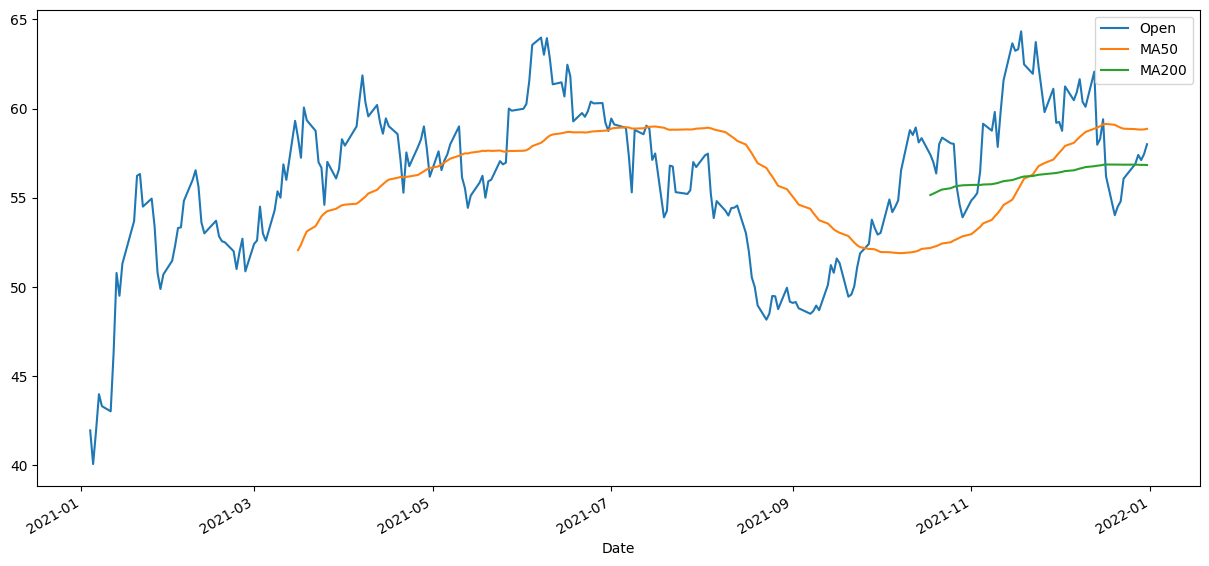

In [23]:
gm['Open'].plot(figsize=(15,7))
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA50'].plot(label='MA50')
gm['MA200']=gm['Open'].rolling(200).mean()
gm['MA200'].plot(label='MA200')
plt.legend()
plt.show()


In [25]:
from pandas.plotting import scatter_matrix
import pandas as pd


In [26]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

<IPython.core.display.Javascript object>

In [27]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

array([[<AxesSubplot: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot: xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot: xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot: xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot: xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

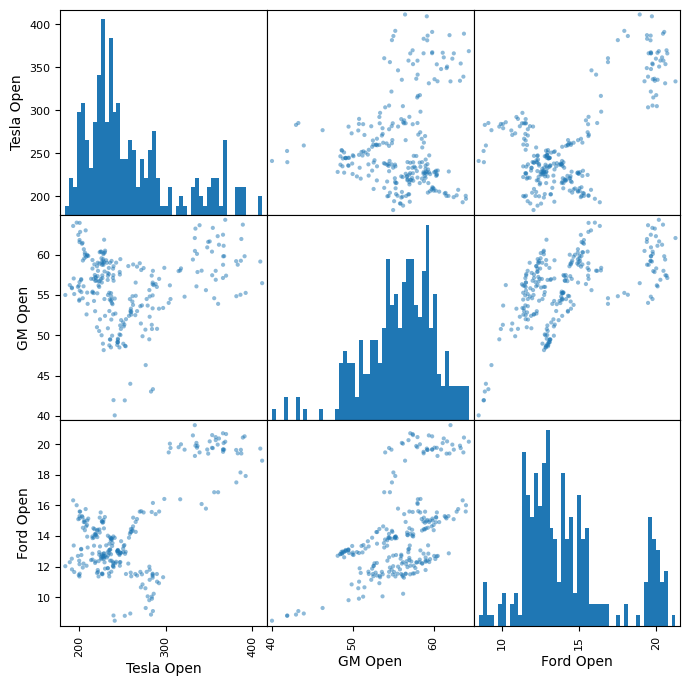

In [29]:
scatter_matrix(car_comp,figsize=(8,8),hist_kwds={'bins':50})

In [35]:
from mpl_finance import candlestick_ochl
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
ford_reset = ford.loc['2021-02-03':'2021-05-05'].reset_index()
ford_reset['date_ax']=ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax','Open','High','Low','Close']].values]

([<matplotlib.lines.Line2D at 0x29af0ad14e0>,
  <matplotlib.patches.Rectangle at 0x29af1ec22f0>])

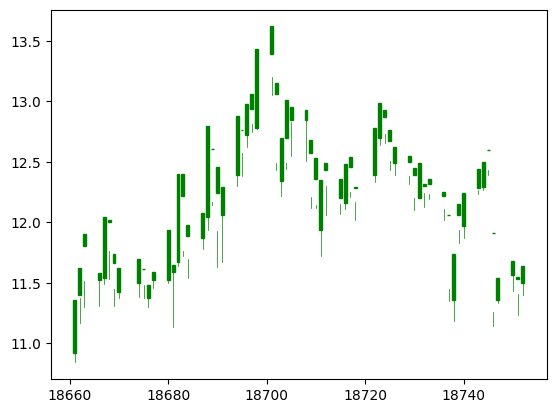

In [38]:
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')
fig, ax = plt.subplots()
candlestick_ochl(ax,ford_values,width=0.6,colorup='g',colordown='b')

Daily Percentage Change

In [40]:
tesla['returns'] = (tesla['Close']/tesla['Close'].shift(1))-1
gm['returns'] = (gm['Close']/gm['Close'].shift(1))-1
ford['returns'] = (ford['Close']/ford['Close'].shift(1))-1

tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2021-01-04,248.163330,239.063339,239.820007,243.256668,145914600,243.256668,3.499324e+10,NaN
2021-01-05,246.946671,239.733337,241.220001,245.036667,96735600,245.036667,2.333456e+10,0.007317
2021-01-06,258.000000,249.699997,252.830002,251.993332,134100000,251.993332,3.390450e+10,0.028390
2021-01-07,272.329987,258.399994,259.209991,272.013336,154496700,272.013336,4.004709e+10,0.079447
2021-01-08,294.829987,279.463318,285.333344,293.339996,225166500,293.339996,6.424751e+10,0.078403


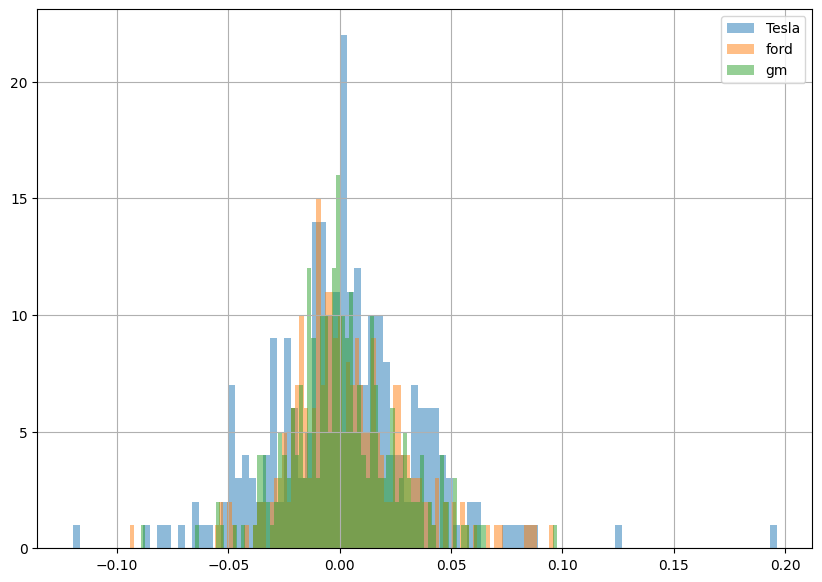

In [43]:
tesla['returns'].hist(bins=100,alpha=0.5,label="Tesla",figsize=(10,7))
ford['returns'].hist(bins=100,alpha=0.5,label="ford")
gm['returns'].hist(bins=100,alpha=0.5,label="gm")
plt.legend()
plt.show()

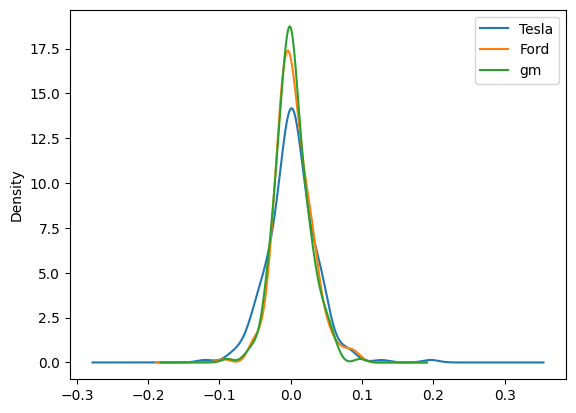

In [44]:
tesla['returns'].plot(kind='kde',label="Tesla")
ford['returns'].plot(kind='kde',label="Ford")
gm['returns'].plot(kind='kde',label="gm")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<AxesSubplot: >

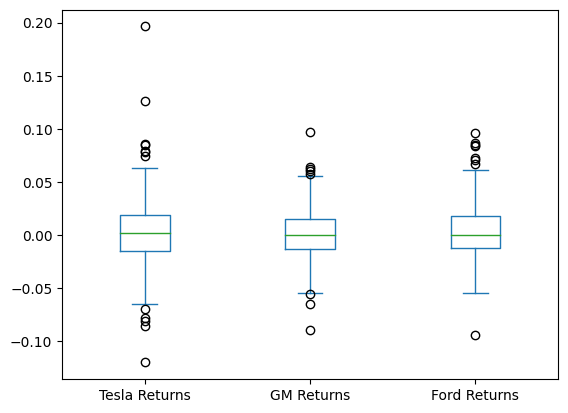

In [47]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns','GM Returns','Ford Returns',]
box_df.plot(kind='box')

array([[<AxesSubplot: xlabel='Tesla Returns', ylabel='Tesla Returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel='Tesla Returns'>,
        <AxesSubplot: xlabel='Ford Returns', ylabel='Tesla Returns'>],
       [<AxesSubplot: xlabel='Tesla Returns', ylabel='GM Returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel='GM Returns'>,
        <AxesSubplot: xlabel='Ford Returns', ylabel='GM Returns'>],
       [<AxesSubplot: xlabel='Tesla Returns', ylabel='Ford Returns'>,
        <AxesSubplot: xlabel='GM Returns', ylabel='Ford Returns'>,
        <AxesSubplot: xlabel='Ford Returns', ylabel='Ford Returns'>]],
      dtype=object)

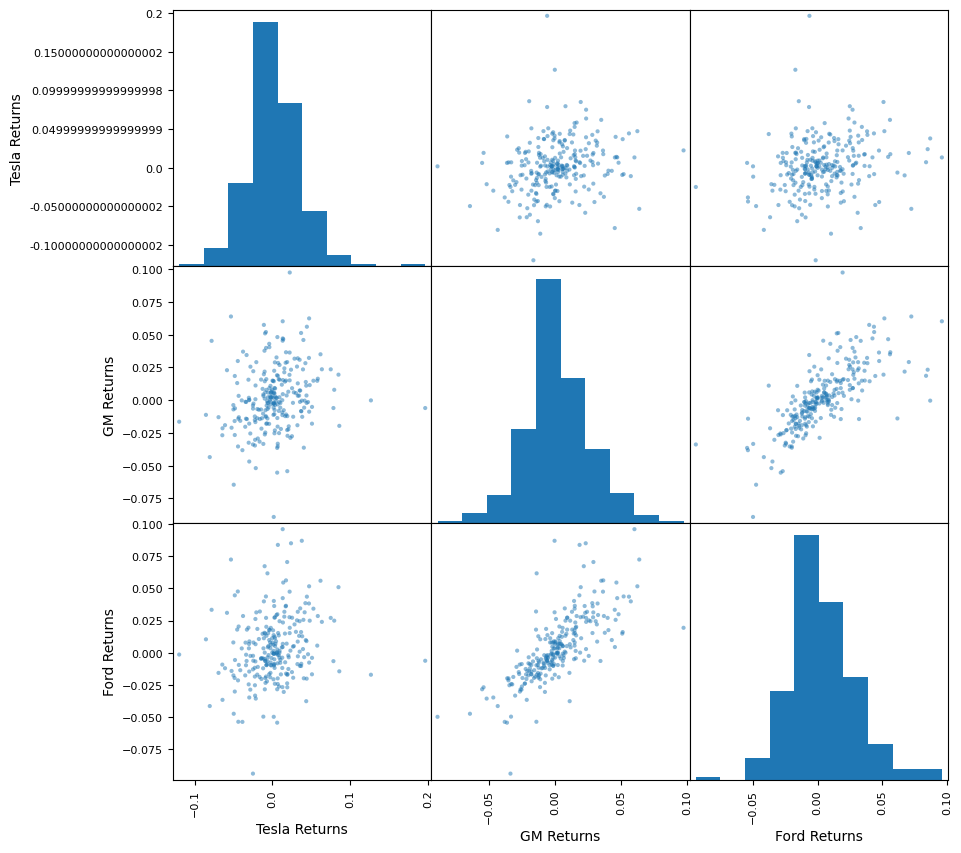

In [48]:
scatter_matrix(box_df,figsize=(10,10))

Cumulative Return


In [49]:
tesla["Cumulative Return"] = (1+tesla["returns"]).cumprod()
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2021-01-04,248.163330,239.063339,239.820007,243.256668,145914600,243.256668,3.499324e+10,NaN,NaN
2021-01-05,246.946671,239.733337,241.220001,245.036667,96735600,245.036667,2.333456e+10,0.007317,1.007317
2021-01-06,258.000000,249.699997,252.830002,251.993332,134100000,251.993332,3.390450e+10,0.028390,1.035915
2021-01-07,272.329987,258.399994,259.209991,272.013336,154496700,272.013336,4.004709e+10,0.079447,1.118215
2021-01-08,294.829987,279.463318,285.333344,293.339996,225166500,293.339996,6.424751e+10,0.078403,1.205887


In [50]:
ford["Cumulative Return"] = (1+ford["returns"]).cumprod()
gm["Cumulative Return"] = (1+gm["returns"]).cumprod()


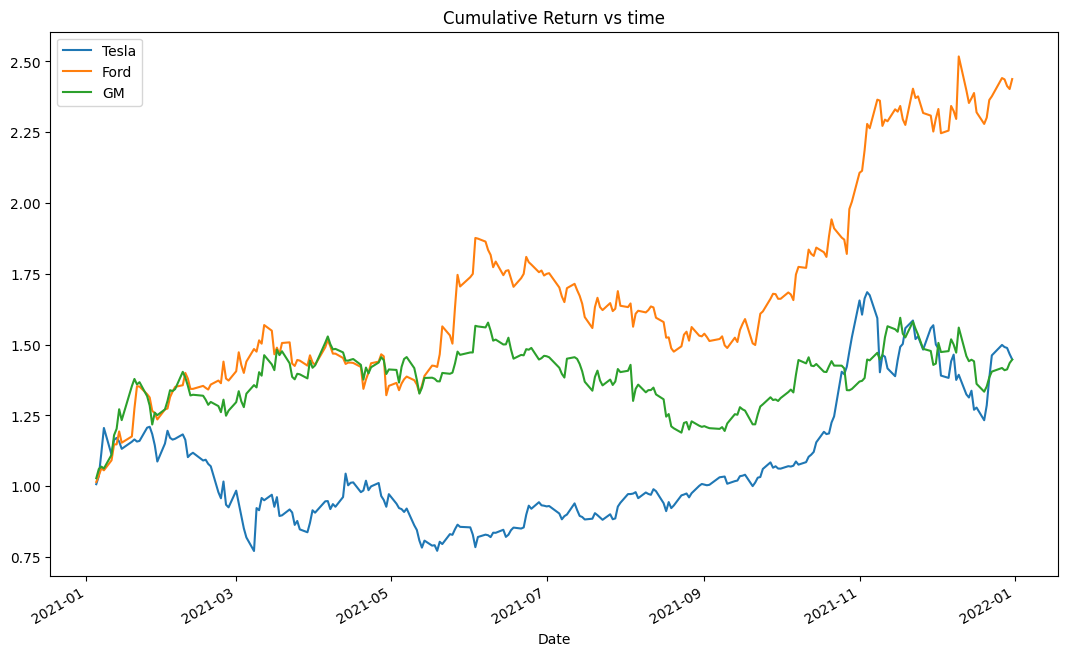

In [52]:
tesla['Cumulative Return'].plot(label="Tesla",figsize=(13,8))
ford['Cumulative Return'].plot(label="Ford")
gm['Cumulative Return'].plot(label="GM")
plt.title("Cumulative Return vs time")
plt.legend()
plt.show()
